In [1]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd
from sklearn.datasets import (
    load_boston,
    make_regression,
)
from sklearn.linear_model import LinearRegression

# Regression

## Simple Linear Regression

Simple linear regression models the relationship between the magnitude of one
variable and that of a second—for example, as X increases, Y also increases. Or
as X increases, Y decreases. Correlation is another way to measure how two
variables are related. The difference is that while
correlation measures the strength of an association between two variables,
regression quantifies the nature of the relationship.

### Key Terms

- **Response**: The variable we are trying to predict.
    - _Synonyms_: dependent variable, Y-variable, target, outcome
- **Independent variable**: The variable used to predict the response.
    - _Synonyms_: independent variable, X-variable, feature, attribute
- **Record**: The vector of predictor and outcome values for a specific individual or case.
    - _Synonyms_: row, case, instance, example
- **Intercept**: The intercept of the regression line—that is, the predicted value when $X = 0$.
    - _Synonyms_: $b_0, \beta_0$
- **Regression Coefficient**: The slop of the regression line.
    - _Synonyms_: Slope, $b_1, \beta_1$, parameter estimates, weights
- **Fitted values**: The estimates obtained from the regression line.
    - _Synonyms_: predicted values
- **Residuals** The difference between the observed values and the fitted values.
    - _Synonyms_: errors
- **Least squares**: The method of fitting a regression by minimizing the sum of squared residuals.
    - _Synonyms_: ordinary least squares
    
### Regression Equation

Simple linear regression estimates exactly how much Y will change when X
changes by a certain amount. With the correlation coefficient, the variables X
and Y are interchangable. With regression, we are trying to predict the Y variable
from X using a linear relationship (i.e., a line):

\begin{equation}
Y = b_0 + b_1X
\end{equation}

We read this as "Y equals $b_1$ times X, plus a constant $b_0$ .” The symbol $b_0$ is
known as the intercept (or constant), and the symbol $b_1$ as the slope for X. Both
can be called coefficients, though in general use the term coefficient is
often reserved for $b_1$. The Y variable is known as the response or dependent
variable since it depends on X. The X variable is known as the predictor or
independent variable. The machine learning community tends to use other terms,
calling Y the target and X a feature vector.

Let's look at a synthetic example below. A dataset has been created with 100
data points, 1 feature, 1 feature being informative and one target variable.

In [2]:
x, y = make_regression(
    n_samples=100,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=10,
    random_state=42
)

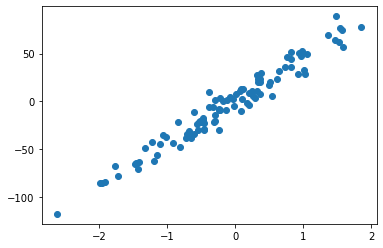

In [3]:
plt.scatter(x, y)

As you can see from the plot the X is clearly correlated with Y.
But how is Y related to X?

Simple linear regression tries to find the "best" line to predict the response Y
as a function of the predictor variable X.

\begin{equation}
Y = b_0 + b_1X
\end{equation}

We can quatify the relation ship by fitting a linear model to the data:

In [4]:
lr = LinearRegression().fit(x, y)
lr.coef_, lr.intercept_

(array([44.43716999]), 1.1651153205269726)

The intercept or $b_0$ is 0.144 and can be interpreted as the predicted Y for when X is zero.
The regression coefficient or $b_1$ can be interpreted as follows: for each additional unit of X
the value of Y increases by 54.60

In [5]:
# e.g. X = -2
1.165 + 44.44 * -2

-87.71499999999999

In [6]:
# e.g. X = 0
1.165 + 44.44 * 0

1.165

The regression line from this model is displayed below:

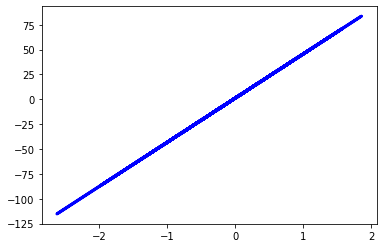

In [7]:
plt.plot(x, lr.predict(x), color='blue', linewidth=3)

The slope or $b_1$ can be calculated as: $b_1 = \Delta Y / \Delta X $ 

### Fitted Values and Residuals

Generally, data doesn't fit on a straight line so the regression line should include
an error term $e_i$:

\begin{equation}
Y_i = b_0 + b_1X_i + e_i
\end{equation}

Fitted values are referred to as predicted values and are typically denoted by $\hat{Y}_i$ (Y-hat). 
The fitted values are given by:
\begin{equation}
\hat{Y}_i = \hat{b}_0 + \hat{b_1}X_i
\end{equation}

The $\hat{}$ notation of the co-efficients indicates these are estimated and not known.

The residuals $\hat{e}_i$ is computed by subtracting the predicted values from the original data:

\begin{equation}
\hat{e}_i = Y_i - \hat{Y}_i
\end{equation}

The residuals are the length of the vertical dashed lines from the data line:

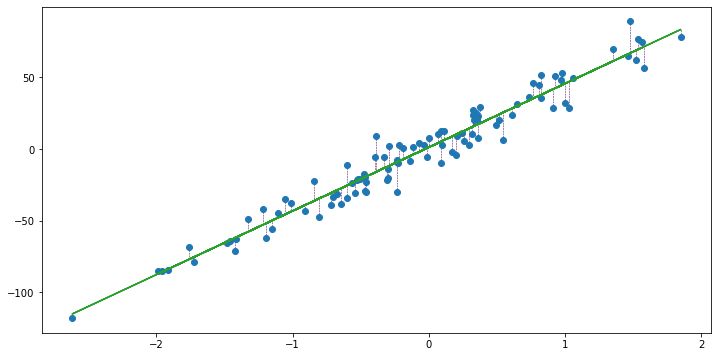

In [58]:
residuals = y - lr.predict(x)

segments = [[[x[i], y[i]], [x[i], y[i] - residuals[i]]] for i in range(y.shape[0])]
lc = LineCollection(segments, zorder=0, linewidths=5.0, linestyle='--', colors='red')
lc.set_array(np.ones(len(y)))
lc.set_linewidths(np.full(y.shape[0], 0.5))

fig, (ax0) = plt.subplots(ncols=1, figsize=(12, 6))

ax0.plot(x, y, 'C0.', markersize=12)
ax0.plot(x, lr.predict(x), 'C2-')
ax0.add_collection(lc)

### Least Squares

How is the model fit to the data? When there is a clear relationship, you could
imagine fitting the line by hand. In practice, the regression line is the estimate
that minimizes the sum of squared residual values, also called the _residual sum
of squares_ or RSS:

\begin{equation}
RSS = \sum^n_{i=1}(Y_{i}-\hat{Y}_i)^2 \\
= \sum^n_{i=1}(Y_i-\hat{b}_0-\hat{b}_1X_i)^2
\end{equation}

The estimates $\hat{b}_0$ and $\hat{b}_1$ are the values that minimize RSS.

The method of minimizing the sum of the squared residuals is termed least
squares regression, or ordinary least squares (OLS) regression. Least
squares regression leads to a simple formula to compute the coefficients:

\begin{equation}
\hat{b}_1 = \frac{\sum^n_{i=1}(Y_{i}-\overline{Y}_i)(X_i-\overline{X})}{\sum^n_{i=1}(X_i-\overline{X})^2} \\
\hat{b}_0 = \overline{Y} - \hat{b}_1\overline{X}
\end{equation}

Least squares, like the mean, are sensitive to outliers, although this tends to be a signicant
problem only in small or moderate-sized problems

### Prediction versus Explanation (Profiling)

With the advent of big data, regression is widely used to form a model to predict
individual outcomes for new data, rather than explain data in hand (i.e., a
predictive model). In this instance, the main items of interest are the fitted values
$\hat{Y}$. In marketing, regression can be used to predict the change in revenue in
response to the size of an ad campaign.

A regression model that fits the data well is set up such that changes in X lead to
changes in Y. However, by itself, the regression equation does not prove the
direction of causation. Conclusions about causation must come from a broader
context of understanding about the relationship. For example, a regression
equation might show a definite relationship between number of clicks on a web
ad and number of conversions. It is our knowledge of the marketing process, not
the regression equation, that leads us to the conclusion that clicks on the ad lead
to sales, and not vice versa.

### Key Takeaways
- The regression equation models the relationship between a response variable Y and a predictor variable X as a line.
- A regression model yields fitted values and residuals—predictions of the response and the errors of the predictions.
- Regression models are typically fit by the method of least squares.
- Regression is used both for prediction and explanation.

## Multiple Linear Regression

When there are multiple predictors, the equation is simply extended to
accommodate them:

\begin{equation}
Y = b_0 + b_1X_1 + b_2X_2 + ... + b_pX_p + e
\end{equation}

- **Root mean squared error**: The square root of the average squared error of the regression (this is the most widely used metric to compare regression models).
    - _Synonyms_: RMSE
- **Residual standard error**:
The same as the root mean squared error, but adjusted for degrees of
freedom.
Synonyms
RSE
- **R-squared**: The proportion of variance explained by the model, from 0 to 1.
    - _Synonyms_:coefficient of determination, $R^2$
- **t-statistic**: The coefficient for a predictor, divided by the standard error of the coefficient, giving a metric to compare the importance of variables in the model.
- **Weighted regression**: Regression with the records having different weights.

All of the other concepts in simple linear regression, such as fitting by least
squares and the definition of fitted values and residuals, extend to the multiple
linear regression setting. For example, the fitted values are given by:
\begin{equation}
\hat{Y} = \hat{b_0} + \hat{b_1}X_{1,i} + \hat{b_2}X_{2,i} + ... + \hat{b_p}X_{p,i} + e
\end{equation}

The interpretation of the coefficients is as with simple linear regression: the
predicted value $\hat{Y}$ changes by the coefficient $b_j$ for each unit change in $X_j$
assuming all the other variables, for $k \neq j$, remain the same.

### Addessing the Model

The most important performance metric from a data science perspective is root
mean squared error, or RMSE. RMSE is the square root of the average squared
error in the predicted $\hat{y}_i$ values:
\begin{equation}
RMSE = \sqrt{\frac{\sum^n_{i=1}{(y_i-\hat{y_i})^2}}{n}}
\end{equation}
This measures the overall accuracy of the model, and is a basis for comparing it
to other models (including models fit using machine learning techniques).
Similar to RMSE is the residual standard error, or RSE. In this case we have $p$
predictors, and the RSE is given by:
\begin{equation}
RSE = \sqrt{\frac{\sum^n_{i=1}{(y_i-\hat{y_i})^2}}{n-p-1}}
\end{equation}
The only difference is that the denominator is the degrees of freedom, as
opposed to number of records. In practice, for linear
regression, the difference between RMSE and RSE is very small, particularly for
big data applications.
Another useful metric that you will see in software output is the coefficient of
determination, also called the R-squared statistic or $R^2$. R-squared ranges from
0 to 1 and measures the proportion of variation in the data that is accounted for
in the model. It is useful mainly in explanatory uses of regression where you
want to assess how well the model fits the data. The formula for $R^2$ is:
\begin{equation}
R^2 = 1 - \frac{\sum^n_{i=1}{(y_i-\hat{y_i})^2}}{\sum^n_{i=1}{(y_i-\overline{y_i})^2}}
\end{equation}
The denominator is proportional to the variance of Y. You may also see reported the
adjusted R-squared, which adjusts for the degrees of freedom; seldom
is this significantly different in multiple regression.

### Model Selection and Stepwise Regression

In some problems, many variables could be used as predictors in a regression.
For example, to predict house value, additional variables such as the basement
size or year built could be used.

Adding more variables, however, does not necessarily mean we have a better
model. Statisticians use the principle of Occam’s razor to guide the choice of a
model: all things being equal, a simpler model should be used in preference to a
more complicated model.

Including additional variables always reduces RMSE and increases $R^2$. Hence,
these are not appropriate to help guide the model choice. In the 1970s, Hirotugu
Akaike, the eminent Japanese statistician, deveoped a metric called AIC
(Akaike’s Information Criteria) that penalizes adding terms to a model. In the
case of regression, AIC has the form:

\begin{equation}
AIC = 2P + n log(RSS/n)
\end{equation}

where p is the number of variables and n is the number of records. The goal is to
find the model that minimizes AIC; models with k more extra variables are
penalized by 2k. RSS is the residual sum of squares.

How do we find the model that minimizes AIC? One approach is to search
through all possible models, called all subset regression. This is computationally
expensive and is not feasible for problems with large data and many variables.
An attractive alternative is to use stepwise regression, which successively adds
and drops predictors to find a model that lowers AIC.

Is is possible to try forward selection and backward selection. In forward selection,
you start with no predictors and add them one-by-one, at each step adding the
predictor that has the largest contribution to , stopping when the contribution
is no longer statistically significant. In backward selection, or backward
elimination, you start with the full model and take away predictors that are not
statistically significant until you are left with a model in which all predictors are
statistically significant.

Penalized regression is similar in spirit to AIC. Instead of explicitly searching
through a discrete set of models, the model-fitting equation incorporates a
constraint that penalizes the model for too many variables (parameters). Rather
than eliminating predictor variables entirely—as with stepwise, forward, and
backward selection—penalized regression applies the penalty by reducing
coefficients, in some cases to near zero. Common penalized regression methods
are _ridge regression_ and _lasso regression_.

Stepwise regression and all subset regression are in-sample methods to assess
and tune models. This means the model selection is possibly subject to
overfitting and may not perform as well when applied to new data. One common
approach to avoid this is to use cross-validation to validate the models. In linear
regression, overfitting is typically not a major issue, due to the simple (linear)
global structure imposed on the data. For more sophisticated types of models,
particularly iterative procedures that respond to local data structure, crossvalidation
is a very important tool.

### Weighted Regression

Weighted regression is used by statisticians for a variety of purposes; in
particular, it is important for analysis of complex surveys. Data scientists may
find weighted regression useful in two cases:

- Inverse-variance weighting when different observations have been measured with different precision.
- Analysis of data in an aggregated form such that the weight variable encodes how many original observations each row in the aggregated data represents.

The coefficents in the weighted regression are slightly different from the original
regression.

### Key Takeaways
- Multiple linear regression models the relationship between a response variable Y and multiple predictor variables $X_1, ..., X_p$
- The most important metrics to evaluate a model are root mean squared error (RMSE) and R-squared ($R^2$).
- The standard error of the coefficients can be used to measure the reliability of a variable’s contribution to a model.
- Stepwise regression is a way to automatically determine which variables should be included in the model.
- Weighted regression is used to give certain records more or less weight in fitting the equation.

## Prediction Using Regression

- **Prediction interval**: An uncertainty interval around an individual predicted value.
- **Extrapolation**: Extension of a model beyond the range of the data used to fit it.

Regression models should not be used to extrapolate beyond the range of the
data. The model is valid only for predictor values for which the data has
sufficient values (even in the case that sufficient data is available, there could be
other problems)

### Confidence and Prediction Intervals

Much of statistics involves understanding and measuring variability
(uncertainty). Confidence intervals which are
uncertainty intervals placed around regression coefficients and predictions. An
easy way to understand this is via the bootstrap (see “The Bootstrap” for more
details about the general bootstrap procedure). The most common regression
confidence intervals encountered in software output are those for regression
parameters (coefficients). Here is a bootstrap algorithm for generating
confidence intervals for regression parameters (coefficients) for a data set with P
predictors and n records (rows):

1. Consider each row (including outcome variable) as a single "ticket" and place all the n tickets in a box.
2. Draw a ticket at random, record the values, and replace it in the box.
3. Repeat step 2 n times; you now have one bootstrap resample.
4. Fit a regression to the bootstrap sample, and record the estimated coefficients.
5. Repeat steps 2 through 4, say, 1,000 times.
6. You now have 1,000 bootstrap values for each coefficient; find the appropriate percentiles for each one (e.g., 5th and 95th for a 90% confidence interval).

The conceptual meaning and interpretation are the
same, and not of central importance to data scientists, because they concern the
regression coefficients. Of greater interest to data scientists are intervals around
predicted y values ($\hat{Y}_i$). The uncertainty \hat{Y}_i around comes from two sources:

- Uncertainty about what the relevant predictor variables and their coefficients are (see the preceding bootstrap algorithm)
- Additional error inherent in individual data points

The individual data point error can be thought of as follows: even if we knew for
certain what the regression equation was (e.g., if we had a huge number of
records to fit it), the actual outcome values for a given set of predictor values
will vary. The bootstrap algorithm for modeling both the regression model error and the individual data
point error would look as follows:

1. Take a bootstrap sample from the data (spelled out in greater detail earlier).
2. Fit the regression, and predict the new value.
3. Take a single residual at random from the original regression fit, add it to the predicted value, and record the result.
4. Repeat steps 1 through 3, say, 1,000 times.
5. Find the 2.5th and the 97.5th percentiles of the results.

**PREDICTION INTERVAL OR CONFIDENCE INTERVAL?**
_A prediction interval pertains to uncertainty around a single value, while a confidence interval
pertains to a mean or other statistic calculated from multiple values. Thus, a prediction interval
will typically be much wider than a confidence interval for the same value. We model this
individual value error in the bootstrap model by selecting an individual residual to tack on to
the predicted value. Which should you use? That depends on the context and the purpose of the
analysis, but, in general, data scientists are interested in specific individual predictions, so a
prediction interval would be more appropriate. Using a confidence interval when you should
be using a prediction interval will greatly underestimate the uncertainty in a given predicted
value._

### Key Takeaways
- Extrapolation beyond the range of the data can lead to error.
- Confidence intervals quantify uncertainty around regression coefficients.
- Prediction intervals quantify uncertainty in individual predictions.
- Most software, R included, will produce prediction and confidence intervals in default or specified output, using formulas.
- The bootstrap can also be used; the interpretation and idea are the same.

## Categorical Variables in Regression

Regression requires numerical inputs, so categorical variables need to be recoded to use in the model. The
most common approach is to convert a variable into a set of binary dummy variables.

- **Dummy variables**: Binary 0–1 variables derived by recoding factor data for use in regression and other models.
- **Reference coding**: The most common type of coding used by statisticians, in which one level of a factor is used as a reference and other factors are compared to that level.
    - _Synonyms_: treatment coding
- **One hot encoder**: A common type of coding used in the machine learning community in which all categorical levels are retained. While useful for certain machine learning algorithms, this approach is not appropriate for multiple linear regression.
- **Deviation coding**: A type of coding that compares each level against the overall mean as opposed to the reference level.
    - _Synonyms_: sum contrasts
    
Imagine we have a categorical feature that can take on three values: `Multiplex`, `Single Family` or `Townhouse`. To use this categorical variable, 
we need to convert it to a set of binary variables. We do this by creating a binary variable for each possible value of the categorical
variable:

In [3]:
df = pd.DataFrame({'Property Type': ['Muliplex', 'Single Family', 'Single Family', 'Townhouse']})
df

,Property Type
0,Muliplex
1,Single Family
2,Single Family
3,Townhouse


Now convert them to binary variables:

In [4]:
pd.get_dummies(df)

,Property Type_Muliplex,Property Type_Single Family,Property Type_Townhouse
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1


The factor categorical PropertyType, which has three distinct levels,
is represented as a matrix with three columns. In the machine learning
community, this representation is referred to as one hot encoding.
In certain machine learning algorithms, such as nearest neighbors and
tree models, one hot encoding is the standard way to represent categorical variables

**DIFFERENT FACTOR CODINGS**
_There are several different ways to encode factor variables, known as contrast coding systems.
For example, deviation coding, also know as sum contrasts, compares each level against the
overall mean. Another contrast is polynomial coding, which is appropriate for ordered factors;
see the section "Ordered Factor Variables". With the exception of ordered factors, data
scientists will generally not encounter any type of coding besides reference coding or one hot
encoder._

## Categorical Variables with Many Levels

Some categorical variables can produce a huge number of binary dummies e.g postal codes. In such
cases, it is useful to explore the data, and the relationships between predictor
variables and the outcome, to determine whether useful information is contained
in the categories. If so, you must further decide whether it is useful to retain all
factors, or whether the levels should be consolidated.

One approach is to group the postal codes according to another variable,
such as sale price. Even better is to form postal code groups using the residuals
from an initial model. For example, the median residual is computed for each postal code and the ntile function is used to
split the postal codes, sorted by the median, into five groups

### Ordered Factor Variables

Some categorical variables reflect levels of a category; these are termed ordered factor
variables or ordered categorical variables. For example, the loan grade could be
A, B, C, and so on—each grade carries more risk than the prior grade. Ordered
categorical variables can typically be converted to numerical values and used as is. 
Treating ordered categorical variables as a numeric variable preserves the information
contained in the ordering that would be lost if it were converted to a factor.

### Key Takeaways
- Factor variables need to be converted into numeric variables for use in a regression.
- The most common method to encode a factor variable with P distinct values is to represent them using P-1 dummy variables.
- A factor variable with many levels, even in very big data sets, may need to be consolidated into a variable with fewer levels.
- Some factors have levels that are ordered and can be represented as a single numeric variable.

## Interpreting the Regression Equation

In data science, the most important use of regression is to predict some
dependent (outcome) variable. In some cases, however, gaining insight from the
equation itself to understand the nature of the relationship between the predictors
and the outcome can be of value.

- **Correlated variables**: When the predictor variables are highly correlated, it is difficult to interpret the individual coefficients.
- **Multicollinearity**: When the predictor variables have perfect, or near-perfect, correlation, the regression can be unstable or impossible to compute.
    - _Synonyms_: collinearity
- **Confounding variables** An important predictor that, when omitted, leads to spurious relationships in a regression equation.
- **Main effects**: The relationship between a predictor and the outcome variable, independent from other variables.
- **Interactions** An interdependent relationship between two or more predictors and the response.

### Correlated Predictors

In multiple regression, the predictor variables are often correlated with each
other. For example if looking at housing data the coefficient for Bedrooms
maybe negative, this implies that adding bedrooms to a house will reduce its value. This is because the predictor
variables are correlated: larger houses tend to have more bedrooms, and it is the
size that drives house value, not the number of bedrooms. Consider two homes
of the exact same size: it is reasonable to expect that a home with more, but
smaller, bedrooms would be considered less desirable.

Having correlated predictors can make it difficult to interpret the sign and value
of regression coefficients (and can inflate the standard error of the estimates).
The variables for bedrooms, house size, and number of bathrooms are all
correlated.

Correlated variables are only one issue with interpreting regression coefficients.

### Multicollinearity

An extreme case of correlated variables produces multicollinearity—a condition
in which there is redundance among the predictor variables. Perfect
multicollinearity occurs when one predictor variable can be expressed as a linear
combination of others. Multicollinearity occurs when:

- A variable is included multiple times by error.
- P dummies, instead of P – 1 dummies, are created from a factor variable.
- Two variables are nearly perfectly correlated with one another.

**Multicollinearity in regression must be addressed—variables should be removed
until the multicollinearity is gone.** A regression does not have a well-defined
solution in the presence of perfect multicollinearity

### Confounding Variables
With correlated variables, the problem is one of **commission**: including different
variables that have a similar predictive relationship with the response. With
confounding variables, the problem is one of **omission**: an important variable is
not included in the regression equation. Naive interpretation of the equation
coefficients can lead to invalid conclusions.

For example a housing dataset without postal code does not contain information on location - 
a very important predictor in house price!

### Interactions and Main Effects

Statisticians like to distinguish between main effects, or independent variables,
and the interactions between the main effects. Main effects are what are often
referred to as the predictor variables in the regression equation. An implicit
assumption when only main effects are used in a model is that the relationship
between a predictor variable and the response is independent of the other
predictor variables. This is often not the case.

For example, location in real estate is everything, and it is natural to presume that the
relationship between, say, house size and the sale price depends on location. A
big house built in a low-rent district is not going to retain the same value as a big
house built in an expensive area.

#### Model Selection with Interaction Terms

In problems involving many variables, it can be challenging to decide which interaction terms
should be included in the model. Several different approaches are commonly taken:

- In some problems, prior knowledge and intuition can guide the choice of which interaction terms to include in the model.
- Stepwise selection (see "Model Selection and Stepwise Regression") can be used to sift through the various models.
- Penalized regression can automatically fit to a large set of possible interaction terms.
- Perhaps the most common approach is the use tree models, as well as their descendents, random forest and gradient boosted trees. This class of models automatically searches for optimal interaction terms

### Key Takeaways

- Because of correlation between predictors, care must be taken in the interpretation of the coefficients in multiple linear regression.
- Multicollinearity can cause numerical instability in fitting the regression equation.
- A confounding variable is an important predictor that is omitted from a model and can lead to a regression equation with spurious relationships.
- An interaction term between two variables is needed if the relationship between the variables and the response is interdependent.